## SEMINARSKA NALOGA

### PRIDOBITEV IN OBLIKOVANJE PODATKOV
 
Stolpci, ki opisujejo naše podatke so naslednji:  
* ZaporednaStevilkaKD,
* MesecStoritve,
* UraStoritve,
* DanVTednu,
* OrganizacijskaEnotaStoritve,
* Povratnik,
* OpisKD,
* PoglavjeKD,
* GospodarskiKriminal,
* OrganiziranKriminal,
* MladoletniskaKriminaliteta,
* Poskus,
* KriminalisticnaOznacba1,
* KriminalisticnaOznacba2,
* KriminalisticnaOznacba3,
* UporabljenoSredstvo1,
* UporabljenoSredstvo2,
* UporabljenoSredstvo3,
* UporabljenoSredstvo4,
* UpravnaEnota,
* OpisKraja,
* LetoZakljucnegaDokumenta,
* VrstaZakDokumenta,
* ZaporednaStevilkaOsebeVKD,
* VrstaOsebe,
* StarostniRazred,
* Spol,
* Drzavljanstvo,
* Poskodba,
* VplivAlkohola,
* VplivMamil,
* OrganiziranaZdruzba,
* Skoda

In [2]:
import pandas as pd
import glob
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

l = glob.glob('data/*.csv')
for i in range(len(l)):
    l[i] = l[i].split('\\')[-1].upper()

# slovar poti do .csv datotek 
csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [3]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

### ANALIZA PODATKOV GLEDE NA ČAS

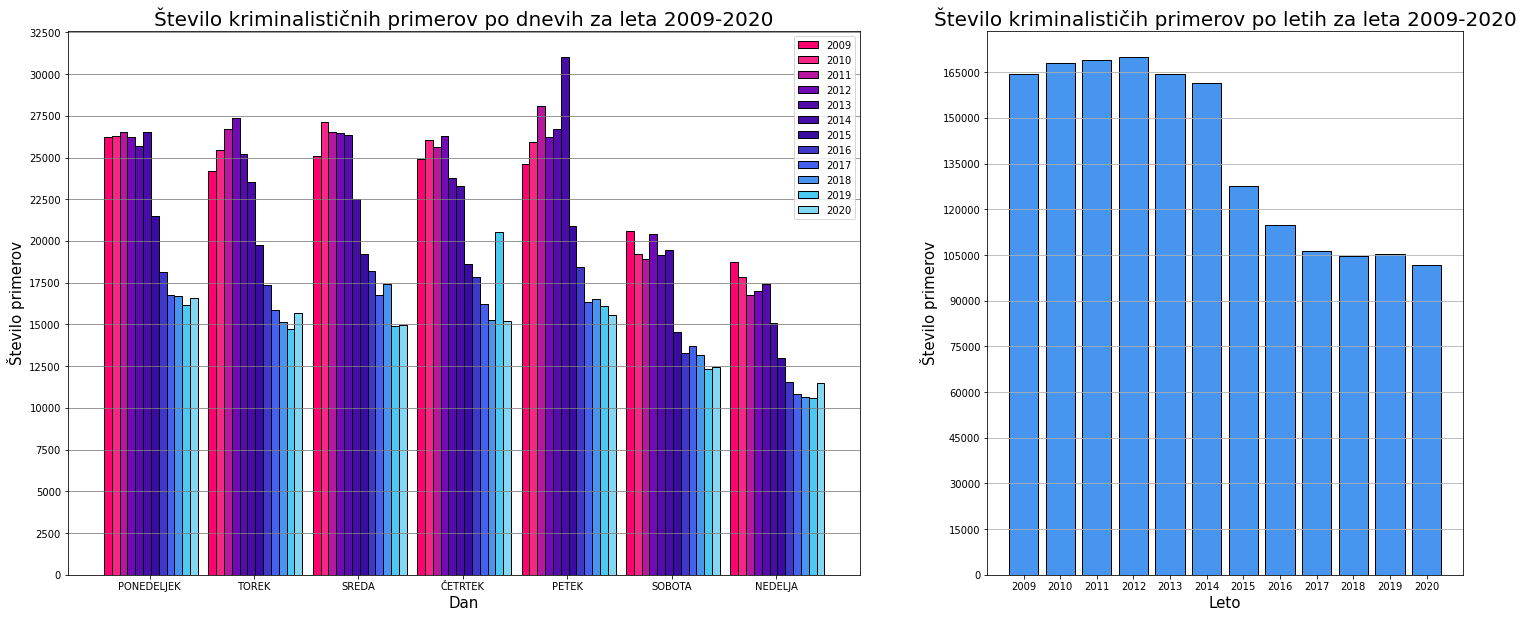

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
def convert_date(s) -> str:
    print(s)
    return s

time_dataframes = {k:v for k,v in dataframes.items()}

l_df = copy(list(time_dataframes.values()))

po_letih = [len(df) for df in l_df]

y_list = []

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')

    dnevi = df1['DanVTednu'].value_counts()
    y_list.append([dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA])

width = 0.9/len(y_list)

f, (p1, p2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5,3]})
f.set_size_inches(25,10)

colors = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

for i in range(len(y_list)):
    color = colors[i]
    n=len(y_list[i])
    r = np.arange(n)
    p1.bar(r+width*i, y_list[i], color = color,
        width = width, edgecolor = 'black',
        label=str(2009+i))

# subplot 1. prikaz kriminalističih primerov po dnevih za leta 2009-2020
p1.set_xticks(r+0.4, ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA'])
p1.set_title('Število kriminalističnih primerov po dnevih za leta 2009-2020', fontsize=20)
p1.set_xlabel('Dan', fontsize=15)
p1.set_ylabel('Število primerov', fontsize=15)
p1.legend()
p1.grid(axis='y', color='gray')
p1.set_yticks(np.arange(0, 35000, step=2500))

# subplot 1. prikaz kriminalističih primerov po letih za leta 2009-2020
p2.bar(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], po_letih, color='#4895EF', edgecolor='black')
p2.set_yticks(np.arange(0, 180000, step=15000))
p2.grid(axis='y')
p2.set_title('Število kriminalističih primerov po letih za leta 2009-2020', fontsize=20)
p2.set_ylabel('Število primerov', fontsize=15)
p2.set_xlabel('Leto', fontsize=15)
plt.show()